In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

In [22]:
import pandas as pd

# Filter requirements.
order = 6
fs = 120.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Load data from a CSV file
df = pd.read_csv('../bluetooth/dados_sensores.csv')

In [8]:
df.head()

,timestamp,acc_X,acc_Y,acc_Z
0,1.742847e+09,-0.189207,0.467029,8.490344
1,1.742847e+09,-0.287402,0.917292,8.224497
2,1.742847e+09,0.071851,0.445474,7.661667
3,1.742847e+09,0.081431,-0.002395,7.381450
4,1.742847e+09,-0.910107,0.857417,9.326206


In [19]:
# Getting the timestamp sample rate
timestamp = df['timestamp']

# convert timestamp to seconds
timestamp = timestamp - timestamp[0]
timestamp = timestamp / 1000

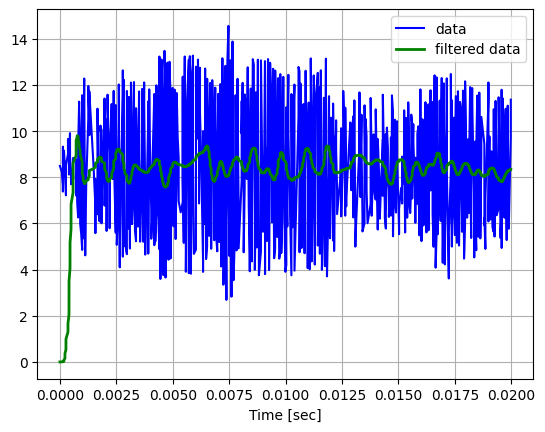

In [23]:
# Filter the data
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# filtering data
data = df['acc_Z']
filtered_data = butter_lowpass_filter(data, cutoff, fs, order)

# Plot the data
plt.figure(1)
plt.plot(timestamp, data, 'b-', label='data')
plt.plot(timestamp, filtered_data, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.show()

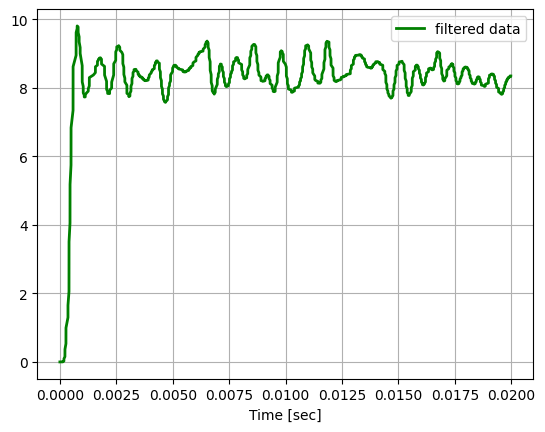

In [15]:
plt.figure(1)
plt.plot(timestamp, filtered_data, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.show()

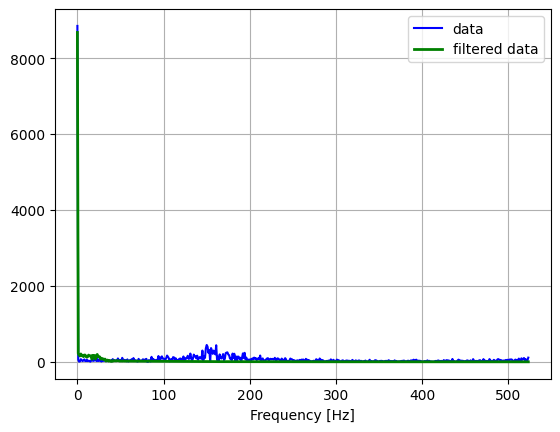

In [24]:
# making a fourier transform of the original data
data_fft = np.fft.fft(data)
data_fft = np.abs(data_fft)
data_fft = data_fft[:len(data_fft)//2]

# making a fourier transform of the filtered data
filtered_data_fft = np.fft.fft(filtered_data)
filtered_data_fft = np.abs(filtered_data_fft)
filtered_data_fft = filtered_data_fft[:len(filtered_data_fft)//2]

# Plot the data
plt.figure(2)
plt.plot(data_fft, 'b-', label='data')
plt.plot(filtered_data_fft, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.legend()

plt.show()